<a href="https://colab.research.google.com/github/ugurcun/Covid-19-inceleme/blob/main/Covid_19_%C4%B0nceleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (161, 10)

First few rows:
                                          contentUrl contentSize  \
0  https://www.kaggle.com/api/v1/datasets/downloa...    18.37 GB   
1                                                NaN         NaN   
2                                                NaN         NaN   
3                                                NaN         NaN   
4                                                NaN         NaN   

                        md5  \
0  Xo4SWofciXKmLzU7KuRmhA==   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   

                                      encodingFormat  \
0                                    application/zip   
1                                   application/json   
2  application/vnd.openxmlformats-officedocument....   
3                                    application/pdf   
4                                         text/plain   

                         

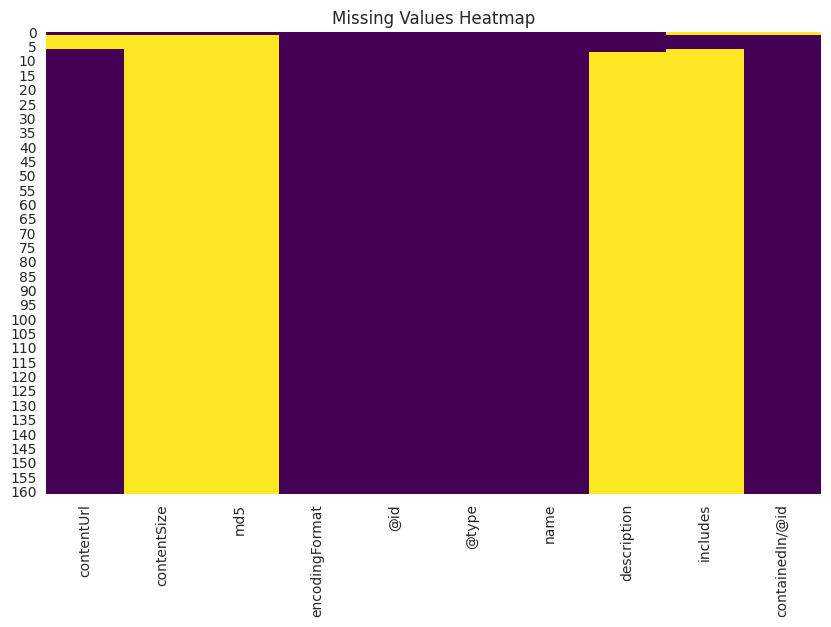

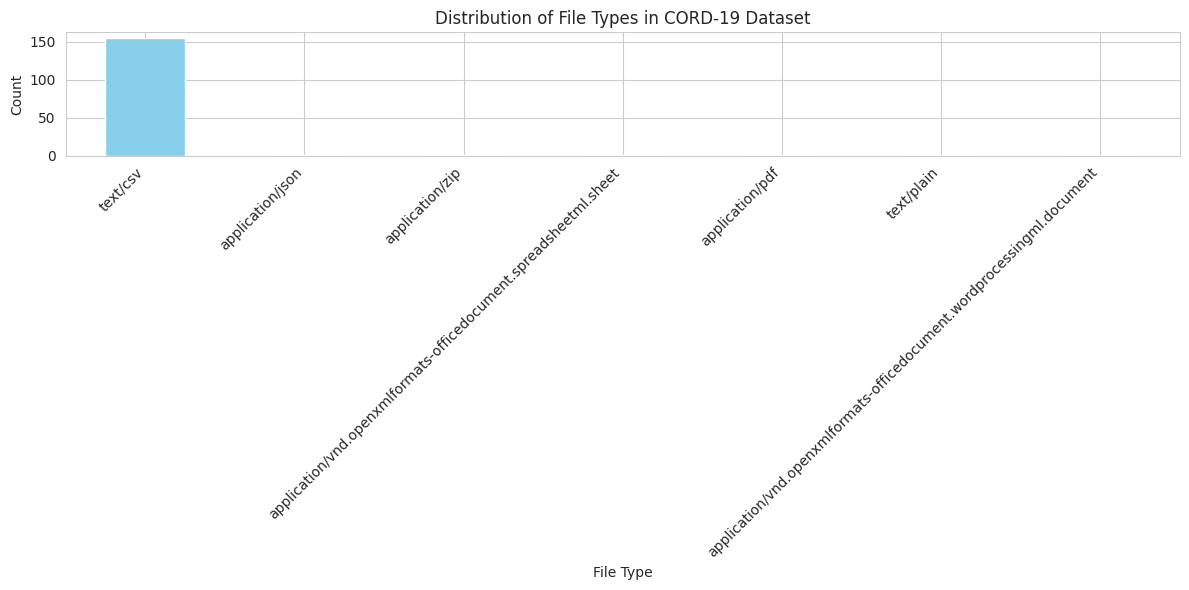

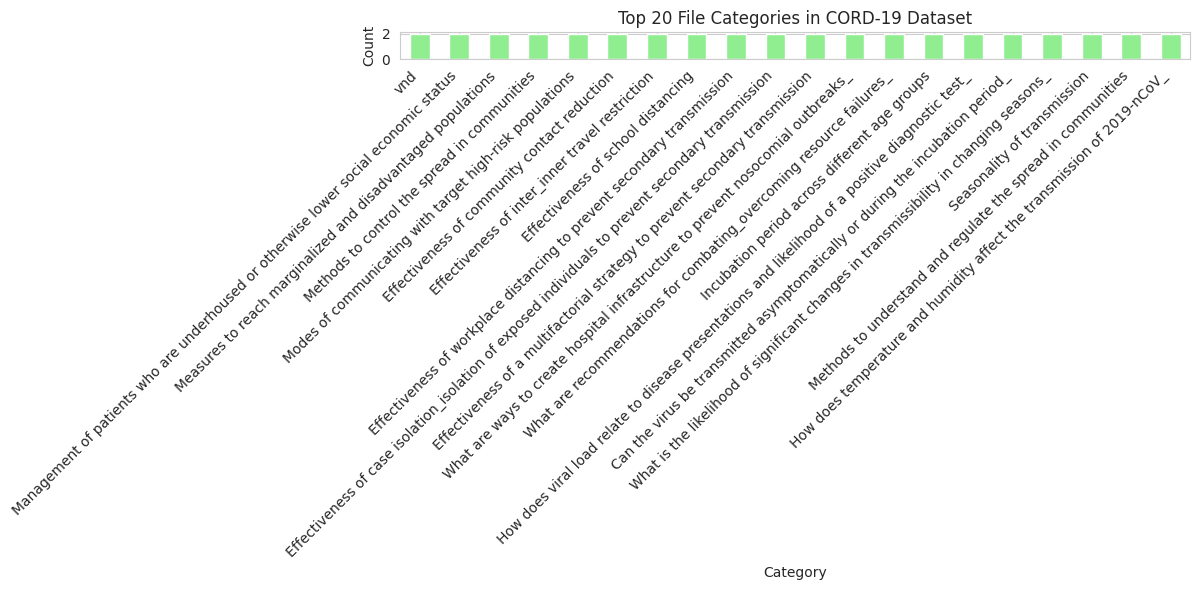

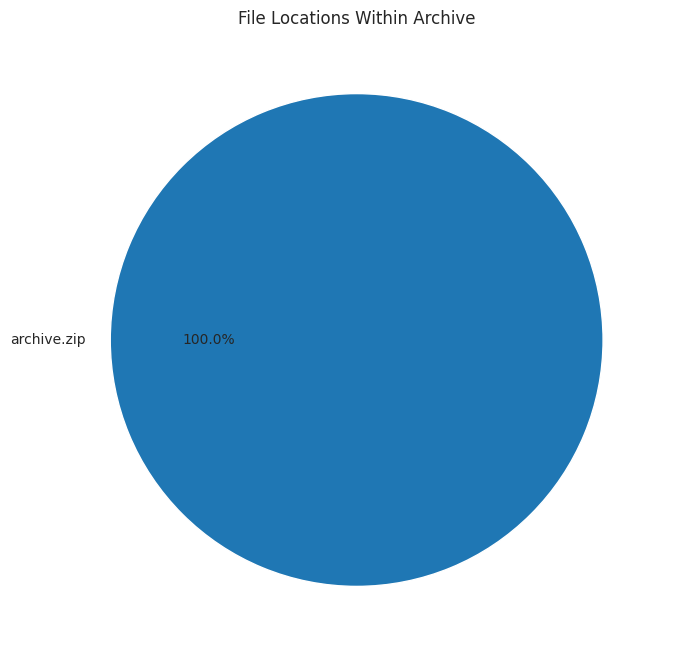

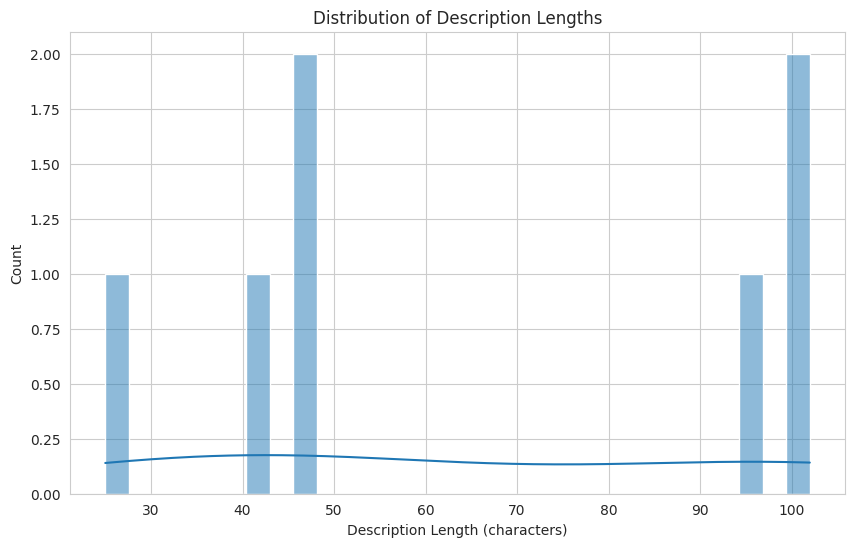

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

# 1. Load and initial examination
df = pd.read_csv('CORD-19-research-challenge-metadata.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumns and data types:")
print(df.dtypes)

# 2. Missing values analysis
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nPercentage of missing values:")
print(df.isnull().mean() * 100)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 3. Data cleaning
df_clean = df.drop(['contentUrl', 'contentSize', 'md5'], axis=1)
df_clean['description'] = df_clean['description'].fillna('')

# 4. EDA
# File types distribution
file_types = df_clean['encodingFormat'].value_counts()
plt.figure(figsize=(12, 6))
file_types.plot(kind='bar', color='skyblue')
plt.title('Distribution of File Types in CORD-19 Dataset')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Categories analysis
df_clean['category'] = df_clean['name'].apply(lambda x: x.split('.')[0].split('/')[-1] if isinstance(x, str) else '')
categories = df_clean['category'].value_counts().head(20)
plt.figure(figsize=(12, 6))
categories.plot(kind='bar', color='lightgreen')
plt.title('Top 20 File Categories in CORD-19 Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Containment structure
contained_in = df_clean['containedIn/@id'].value_counts()
plt.figure(figsize=(8, 8))
contained_in.plot(kind='pie', autopct='%1.1f%%')
plt.title('File Locations Within Archive')
plt.ylabel('')
plt.show()

# Description length analysis
df_clean['description_length'] = df_clean['description'].apply(len)
has_description = df_clean[df_clean['description_length'] > 0]
plt.figure(figsize=(10, 6))
sns.histplot(has_description['description_length'], bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length (characters)')
plt.ylabel('Count')
plt.show()